In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df=pd.read_csv("AmesHousing.csv")
#df
df.describe()

Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.245361       20.860286    179.112611   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1954.000000     1965.000000      0.000000   
50%        6.000000      5.000000  1973.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    164.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       ...  Wood Deck SF  Open Porch SF  Enclosed Porch   3Ssn Porch  \
count  ...   2930.000000    2930.000000     2930.000000  2930.000000   
mean   ...     93.751877      47.533447       23.011604     2.592491   
std    ...    126.361562      67.483400       64.139059    25.141331   
min    ...      0.000000       0.000000        0.000000     0.000000   
25%    ...      0.000000       0.000000        0.000000     0.000000   
50%    ...      0.000000      27.000000        0.000000     0.000000   
75%    ...    168.000000      70.000000        0.000000     0.000000   
max    ...   1424.000000     742.000000     1012.000000   508.000000   

       Screen Porch    Pool Area      Misc Val      Mo Sold      Yr Sold  \
count   2930.000000  2930.000000   2930.000000  2930.000000  2930.000000   
mean      16.002048     2.243345     50.635154     6.216041  2007.790444   
std       56.087370    35.597181    566.344288     2.714492     1.316613   
min        0.000000     0.000000      0.000000     1.000000  2006.000000   
25%        0.000000     0.000000      0.000000     4.000000  2007.000000   
50%        0.000000     0.000000      0.000000     6.000000  2008.000000   
75%        0.000000     0.000000      0.000000     8.000000  2009.000000   
max      576.000000   800.000000  17000.000000    12.000000  2010.000000   

           SalePrice  
count    2930.000000  
mean   180796.060068  
std     79886.692357  
min     12789.000000  
25%    129500.000000  
50%    160000.000000  
75%    213500.000000  
max    755000.000000  

[8 rows x 39 columns]

In [3]:
df.shape

(2930, 82)

<Axes: >

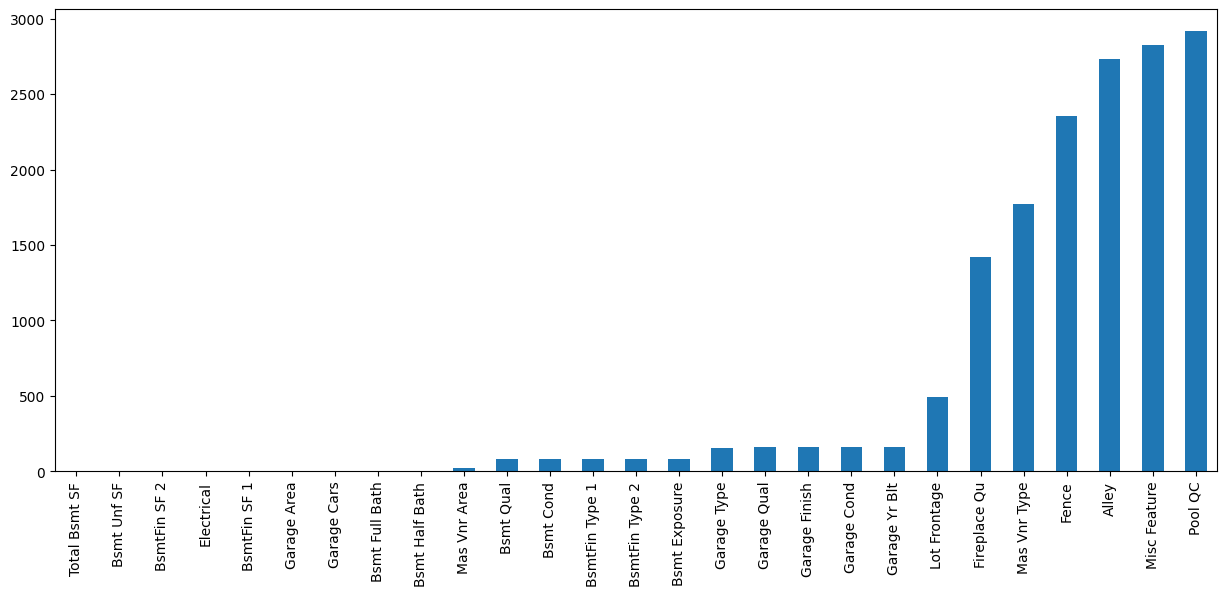

In [4]:
not_available=df.isnull().sum()
not_available=not_available[not_available>0]
not_available.sort_values(inplace=True)
plt.figure(figsize=(15,6))
not_available.plot.bar()

In [5]:

df['SalePrice'].describe()
#df.drop_duplicates()
#df.shape
df.count()

Order             2930
PID               2930
MS SubClass       2930
MS Zoning         2930
Lot Frontage      2440
                  ... 
Mo Sold           2930
Yr Sold           2930
Sale Type         2930
Sale Condition    2930
SalePrice         2930
Length: 82, dtype: int64

In [6]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

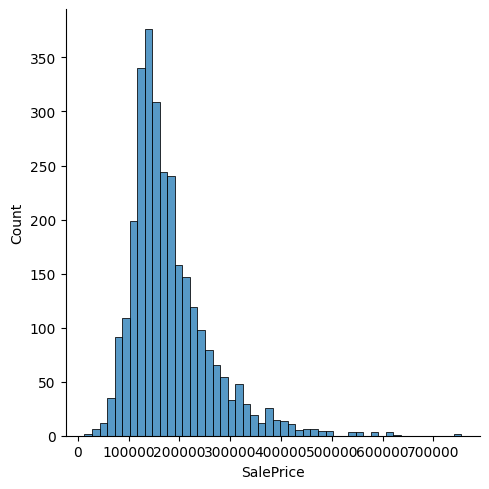

In [7]:
#histogram
sns.displot(df['SalePrice'],bins=50,kde=False)

# Correlation

In [8]:
int_features=df.select_dtypes(include=[np.number])
int_features.columns

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

In [9]:
non_int_features=df.select_dtypes(include=[np.object_])
non_int_features.columns
non_int_features.count()

MS Zoning         2930
Street            2930
Alley              198
Lot Shape         2930
Land Contour      2930
Utilities         2930
Lot Config        2930
Land Slope        2930
Neighborhood      2930
Condition 1       2930
Condition 2       2930
Bldg Type         2930
House Style       2930
Roof Style        2930
Roof Matl         2930
Exterior 1st      2930
Exterior 2nd      2930
Mas Vnr Type      1155
Exter Qual        2930
Exter Cond        2930
Foundation        2930
Bsmt Qual         2850
Bsmt Cond         2850
Bsmt Exposure     2847
BsmtFin Type 1    2850
BsmtFin Type 2    2849
Heating           2930
Heating QC        2930
Central Air       2930
Electrical        2929
Kitchen Qual      2930
Functional        2930
Fireplace Qu      1508
Garage Type       2773
Garage Finish     2771
Garage Qual       2771
Garage Cond       2771
Paved Drive       2930
Pool QC             13
Fence              572
Misc Feature       106
Sale Type         2930
Sale Condition    2930
dtype: int6

In [10]:
correlation=int_features.corr()
#correlation.columns
print(correlation['SalePrice'].sort_values(ascending=False))

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Order             -0.031408
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0

<Axes: >

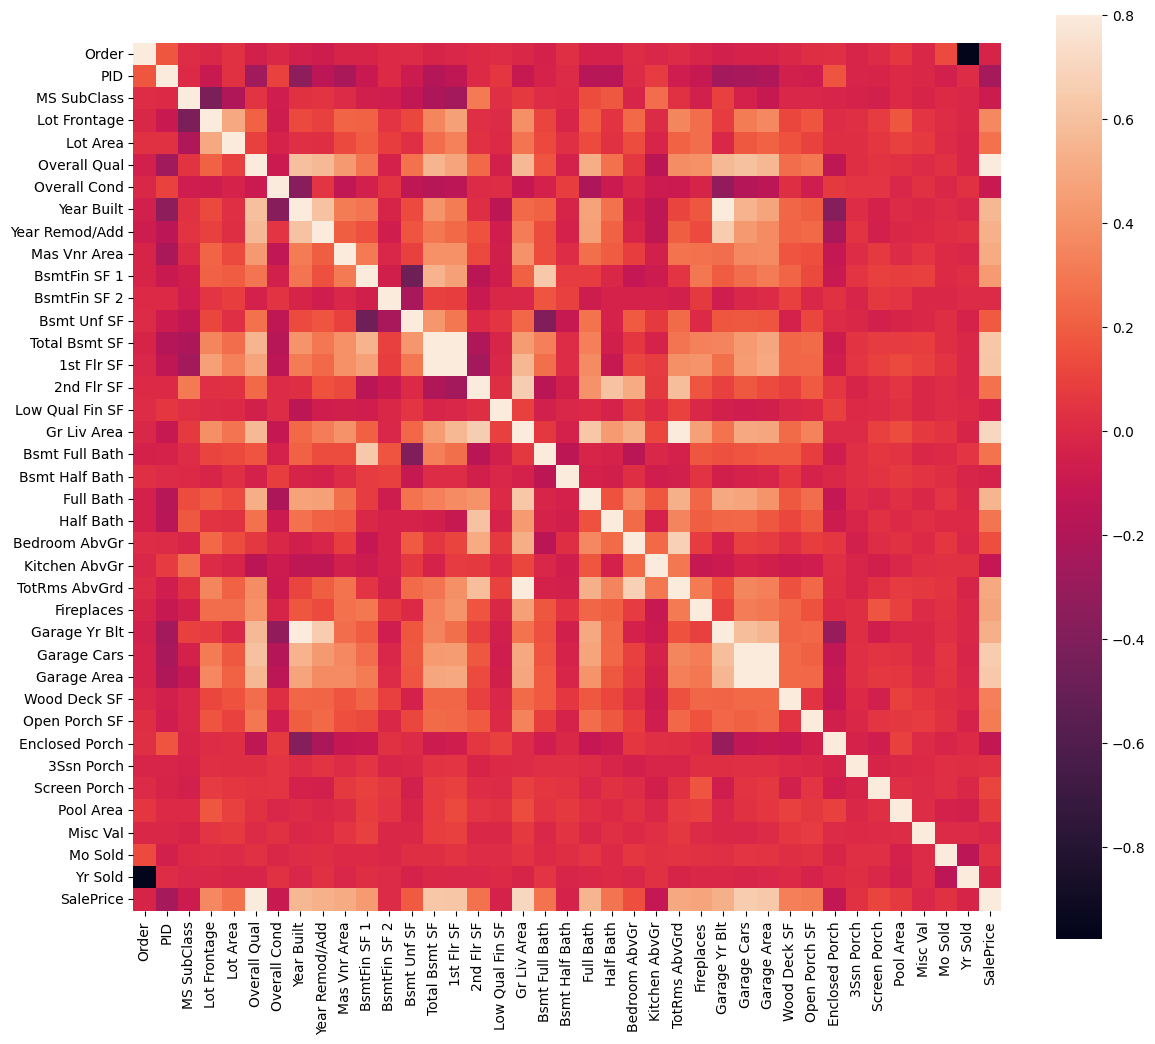

In [11]:
#HeatMap
f , ax= plt.subplots(figsize=(14,12))
sns.heatmap(correlation,square=True,vmax=0.8)

Index(['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars',
       'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath',
       'Year Remod/Add', 'Garage Yr Blt'],
      dtype='object')


<Axes: >

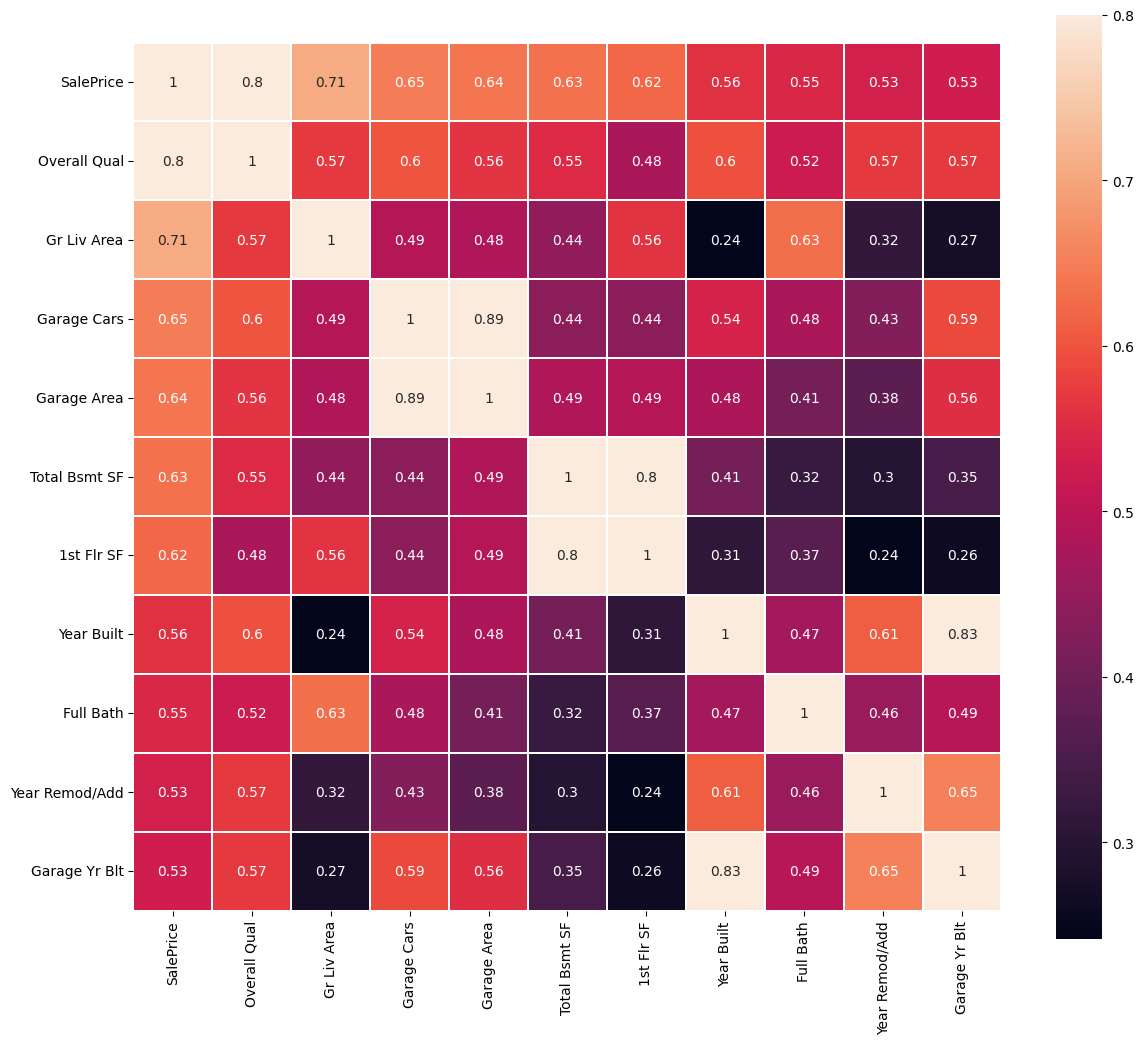

In [12]:
k=11
cols = correlation.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
#cm = np.corrcoef(df[cols].values.T)
cm=df[cols].corr()
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=0.8, linewidths=0.01,square=True,annot=True, xticklabels = cols.values,yticklabels = cols.values)
#sns.heatmap(cm,square=True,vmax=0.8)

<Axes: xlabel='Garage Cars', ylabel='SalePrice'>

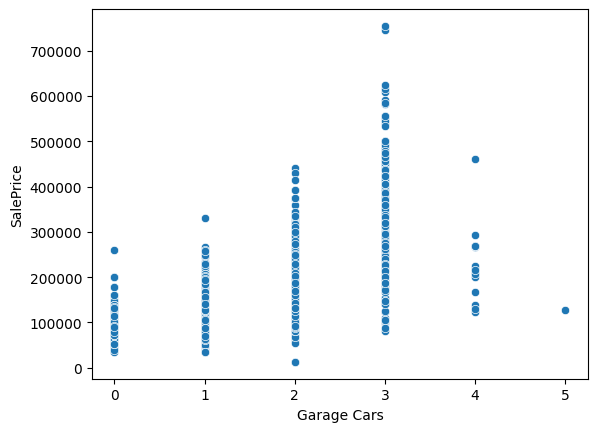

In [13]:
#scatter plot
sns.scatterplot(x='Garage Cars',y='SalePrice',data=df)

<Axes: xlabel='SalePrice'>

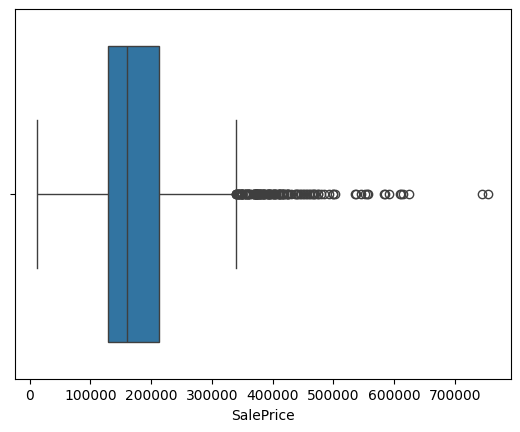

In [14]:
sns.boxplot(x=df['SalePrice'])

In [15]:
#Removed outliers
df.shape
df['SalePrice'].describe()
first_quartile=df['SalePrice'].quantile(.25)
third_quartile=df['SalePrice'].quantile(.75)
IQR=third_quartile-first_quartile

In [16]:
new_boundary=third_quartile+3*IQR
df.drop(df[df['SalePrice']>new_boundary].index,axis=0,inplace=True)
df.shape

(2904, 82)

In [17]:
#f , ax = plt.subplots(figsize = (14,12))
#fig=sns.boxplot(x='Sale Type',y='SalePrice',data=df)



In [18]:
#f , ax = plt.subplots(figsize = (14,12))
#fig=sns.boxplot(x='Overall Qual',y='SalePrice',data=df)

In [19]:
#drop cols which is not required
df.drop([
    'Wood Deck SF', 'Open Porch SF', 'Half Bath', 'Bsmt Full Bath', '2nd Flr SF', 
    'Lot Area', 'Bsmt Unf SF', 'Bedroom AbvGr', 'Screen Porch', 'Pool Area', 
    'Mo Sold', '3Ssn Porch', 'BsmtFin SF 2', 'Misc Val', 'Yr Sold', 'Order', 
    'Bsmt Half Bath', 'Low Qual Fin SF', 'MS SubClass', 'Overall Cond',  
    'Kitchen AbvGr', 'Enclosed Porch', 'PID'
], axis=1, inplace=True, errors='ignore')
df.shape

(2904, 59)

In [20]:
int_features=df.select_dtypes(include=[np.number])
int_features.count()

Lot Frontage      2415
Overall Qual      2904
Year Built        2904
Year Remod/Add    2904
Mas Vnr Area      2881
BsmtFin SF 1      2903
Total Bsmt SF     2903
1st Flr SF        2904
Gr Liv Area       2904
Full Bath         2904
TotRms AbvGrd     2904
Fireplaces        2904
Garage Yr Blt     2745
Garage Cars       2903
Garage Area       2903
SalePrice         2904
dtype: int64

In [21]:
df.fillna({
    'Lot Frontage': df['Lot Frontage'].median(),
    'Mas Vnr Area': df['Mas Vnr Area'].median(),
    'BsmtFin SF 1': 0,
    'Total Bsmt SF': df['Total Bsmt SF'].median(),
    'Garage Yr Blt': 0,  # 0 if no garage
    'Garage Cars': df['Garage Cars'].mode()[0],
    'Garage Area': df['Garage Area'].median()
}, inplace=True)

# dropping garage area as it is correlated with garage cars and garage cars has more correlation with saleprice same with 1st Flr SF and Total Bsmt SF 
# it is from heatmap
df.drop(['Garage Area','1st Flr SF'],axis=1,inplace=True)
df.shape

(2904, 57)

In [22]:
int_features=df.select_dtypes(include=[np.number])
int_features.count()

Lot Frontage      2904
Overall Qual      2904
Year Built        2904
Year Remod/Add    2904
Mas Vnr Area      2904
BsmtFin SF 1      2904
Total Bsmt SF     2904
Gr Liv Area       2904
Full Bath         2904
TotRms AbvGrd     2904
Fireplaces        2904
Garage Yr Blt     2904
Garage Cars       2904
SalePrice         2904
dtype: int64

In [23]:
non_int_features=df.select_dtypes(include=[np.object_])
non_int_features.columns
non_int_features.count()

MS Zoning         2904
Street            2904
Alley              198
Lot Shape         2904
Land Contour      2904
Utilities         2904
Lot Config        2904
Land Slope        2904
Neighborhood      2904
Condition 1       2904
Condition 2       2904
Bldg Type         2904
House Style       2904
Roof Style        2904
Roof Matl         2904
Exterior 1st      2904
Exterior 2nd      2904
Mas Vnr Type      1131
Exter Qual        2904
Exter Cond        2904
Foundation        2904
Bsmt Qual         2824
Bsmt Cond         2824
Bsmt Exposure     2821
BsmtFin Type 1    2824
BsmtFin Type 2    2823
Heating           2904
Heating QC        2904
Central Air       2904
Electrical        2903
Kitchen Qual      2904
Functional        2904
Fireplace Qu      1482
Garage Type       2747
Garage Finish     2745
Garage Qual       2745
Garage Cond       2745
Paved Drive       2904
Pool QC             11
Fence              569
Misc Feature       106
Sale Type         2904
Sale Condition    2904
dtype: int6

In [24]:
df.fillna({
    'Alley': 'NoAlley',
    'Mas Vnr Type': 'None',
    'Bsmt Qual': 'NoBasement',
    'Bsmt Cond': 'NoBasement',
    'Bsmt Exposure': 'NoBasement',
    'BsmtFin Type 1': 'NoBasement',
    'BsmtFin Type 2': 'NoBasement',
    'Fireplace Qu': 'NoFireplace',
    'Garage Type': 'NoGarage',
    'Garage Finish': 'NoGarage',
    'Garage Qual': 'NoGarage',
    'Garage Cond': 'NoGarage',
    'Fence': 'NoFence'
}, inplace=True)
df.drop(['Pool QC', 'Misc Feature'], axis=1, inplace=True)

In [25]:
non_int_features=df.select_dtypes(include=[np.object_])
non_int_features.columns
non_int_features.count()

MS Zoning         2904
Street            2904
Alley             2904
Lot Shape         2904
Land Contour      2904
Utilities         2904
Lot Config        2904
Land Slope        2904
Neighborhood      2904
Condition 1       2904
Condition 2       2904
Bldg Type         2904
House Style       2904
Roof Style        2904
Roof Matl         2904
Exterior 1st      2904
Exterior 2nd      2904
Mas Vnr Type      2904
Exter Qual        2904
Exter Cond        2904
Foundation        2904
Bsmt Qual         2904
Bsmt Cond         2904
Bsmt Exposure     2904
BsmtFin Type 1    2904
BsmtFin Type 2    2904
Heating           2904
Heating QC        2904
Central Air       2904
Electrical        2903
Kitchen Qual      2904
Functional        2904
Fireplace Qu      2904
Garage Type       2904
Garage Finish     2904
Garage Qual       2904
Garage Cond       2904
Paved Drive       2904
Fence             2904
Sale Type         2904
Sale Condition    2904
dtype: int64

In [26]:
df.head()

MS Zoning  Lot Frontage Street    Alley Lot Shape Land Contour Utilities  \
0        RL         141.0   Pave  NoAlley       IR1          Lvl    AllPub   
1        RH          80.0   Pave  NoAlley       Reg          Lvl    AllPub   
2        RL          81.0   Pave  NoAlley       IR1          Lvl    AllPub   
3        RL          93.0   Pave  NoAlley       Reg          Lvl    AllPub   
4        RL          74.0   Pave  NoAlley       IR1          Lvl    AllPub   

  Lot Config Land Slope Neighborhood  ... Garage Yr Blt Garage Finish  \
0     Corner        Gtl        NAmes  ...        1960.0           Fin   
1     Inside        Gtl        NAmes  ...        1961.0           Unf   
2     Corner        Gtl        NAmes  ...        1958.0           Unf   
3     Corner        Gtl        NAmes  ...        1968.0           Fin   
4     Inside        Gtl      Gilbert  ...        1997.0           Fin   

  Garage Cars Garage Qual  Garage Cond  Paved Drive    Fence Sale Type  \
0         2.0          TA           TA            P  NoFence       WD    
1         1.0          TA           TA            Y    MnPrv       WD    
2         1.0          TA           TA            Y  NoFence       WD    
3         2.0          TA           TA            Y  NoFence       WD    
4         2.0          TA           TA            Y    MnPrv       WD    

  Sale Condition SalePrice  
0         Normal    215000  
1         Normal    105000  
2         Normal    172000  
3         Normal    244000  
4         Normal    189900  

[5 rows x 55 columns]

# Categorical Features

In [27]:
non_int_features.head()


MS Zoning Street    Alley Lot Shape Land Contour Utilities Lot Config  \
0        RL   Pave  NoAlley       IR1          Lvl    AllPub     Corner   
1        RH   Pave  NoAlley       Reg          Lvl    AllPub     Inside   
2        RL   Pave  NoAlley       IR1          Lvl    AllPub     Corner   
3        RL   Pave  NoAlley       Reg          Lvl    AllPub     Corner   
4        RL   Pave  NoAlley       IR1          Lvl    AllPub     Inside   

  Land Slope Neighborhood Condition 1  ... Functional Fireplace Qu  \
0        Gtl        NAmes        Norm  ...        Typ           Gd   
1        Gtl        NAmes       Feedr  ...        Typ  NoFireplace   
2        Gtl        NAmes        Norm  ...        Typ  NoFireplace   
3        Gtl        NAmes        Norm  ...        Typ           TA   
4        Gtl      Gilbert        Norm  ...        Typ           TA   

  Garage Type Garage Finish Garage Qual Garage Cond Paved Drive    Fence  \
0      Attchd           Fin          TA          TA           P  NoFence   
1      Attchd           Unf          TA          TA           Y    MnPrv   
2      Attchd           Unf          TA          TA           Y  NoFence   
3      Attchd           Fin          TA          TA           Y  NoFence   
4      Attchd           Fin          TA          TA           Y    MnPrv   

  Sale Type Sale Condition  
0       WD          Normal  
1       WD          Normal  
2       WD          Normal  
3       WD          Normal  
4       WD          Normal  

[5 rows x 41 columns]

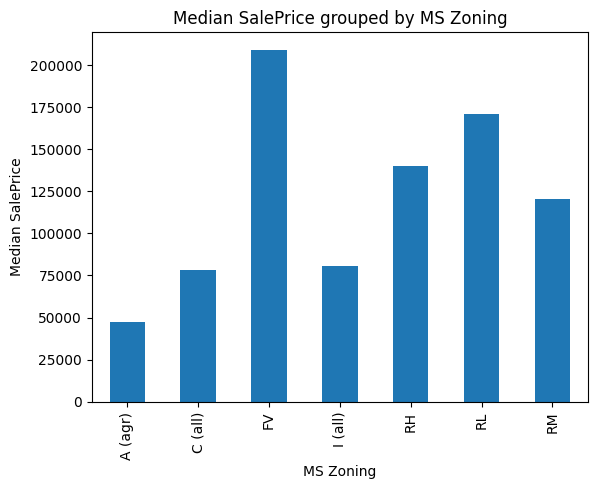

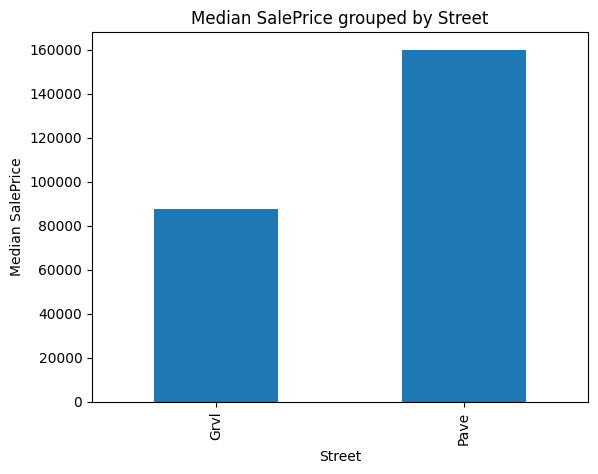

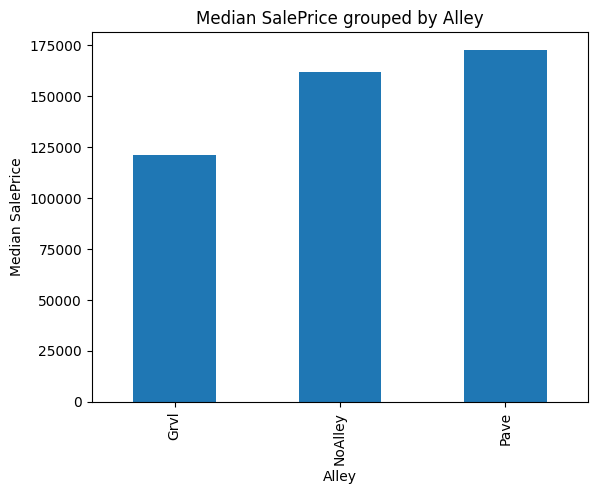

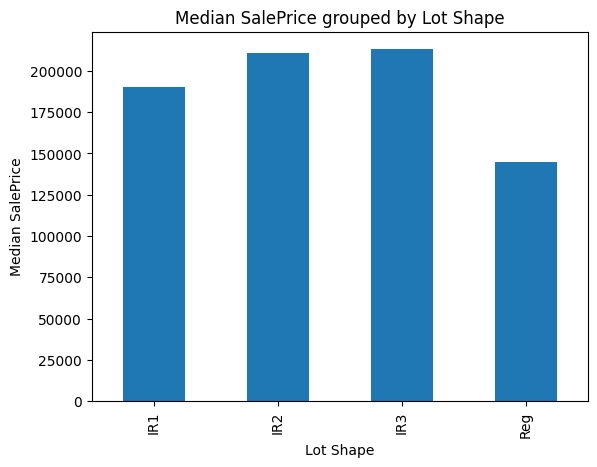

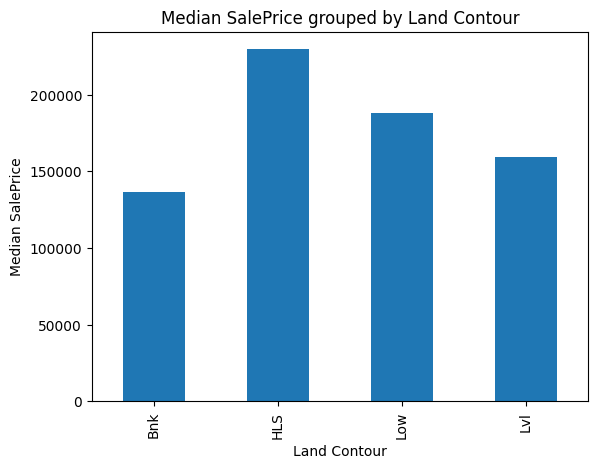

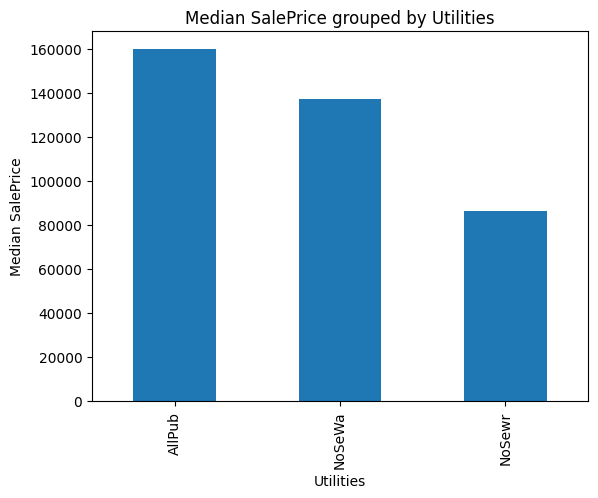

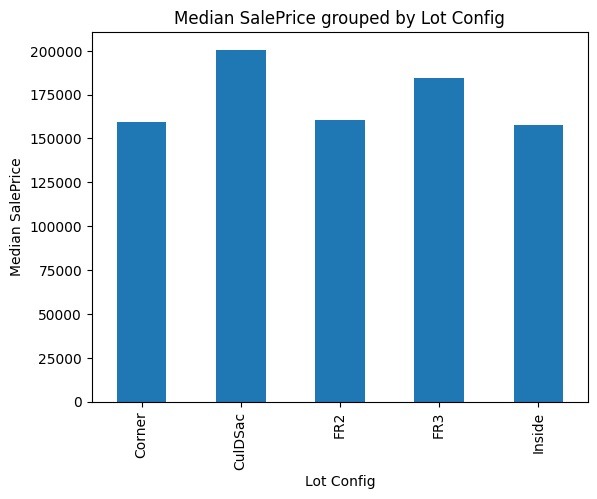

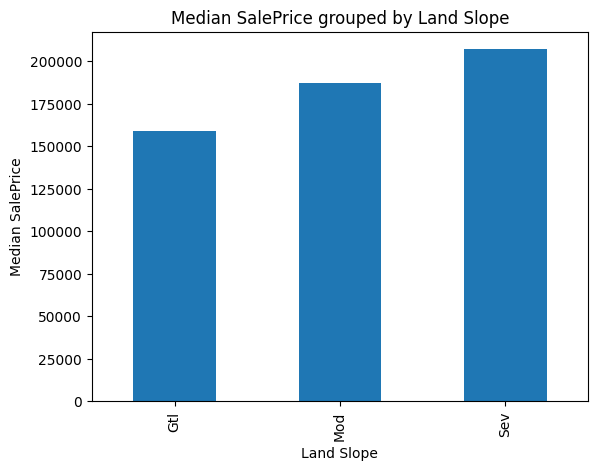

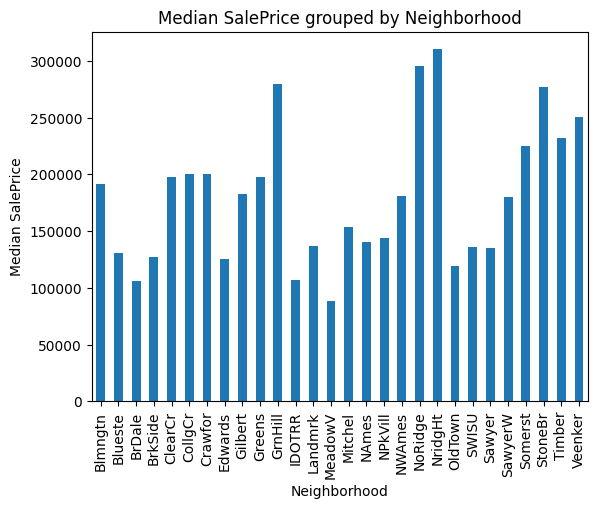

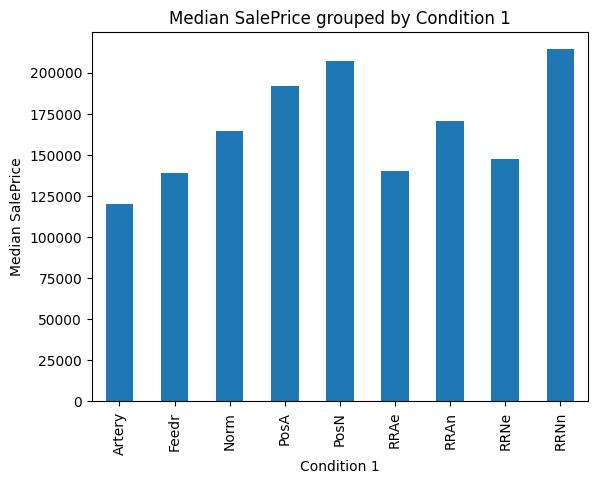

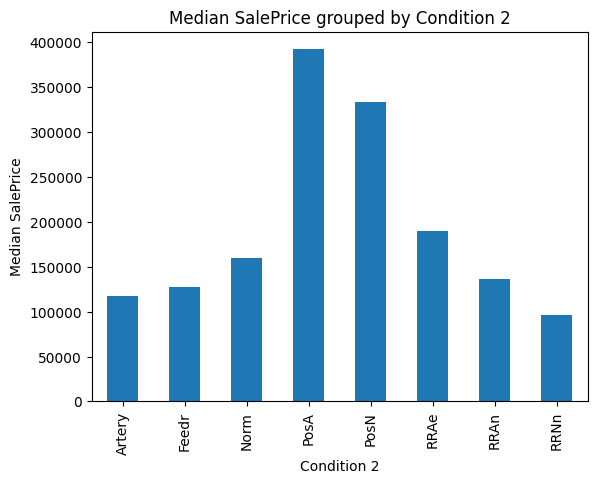

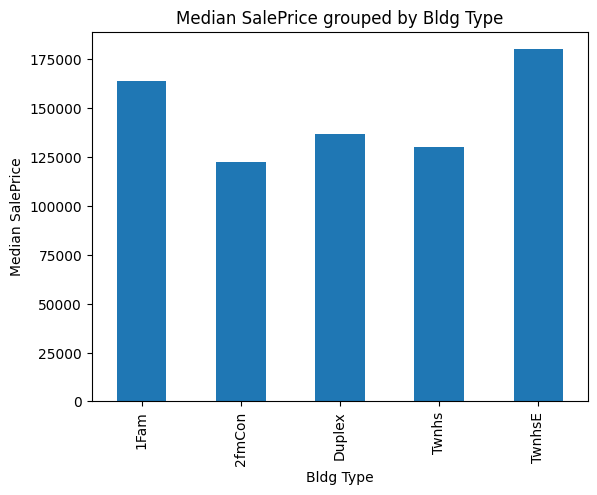

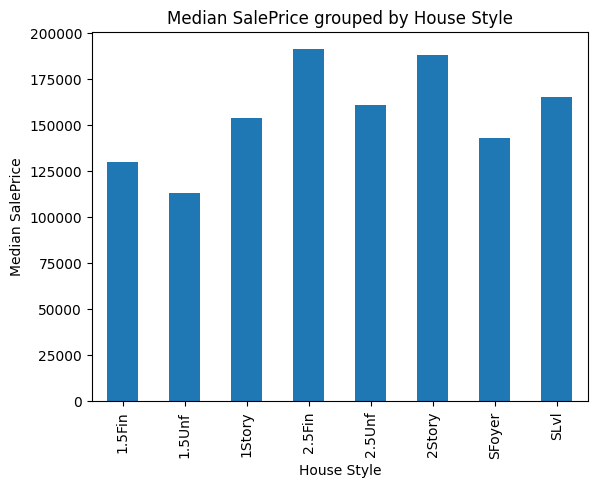

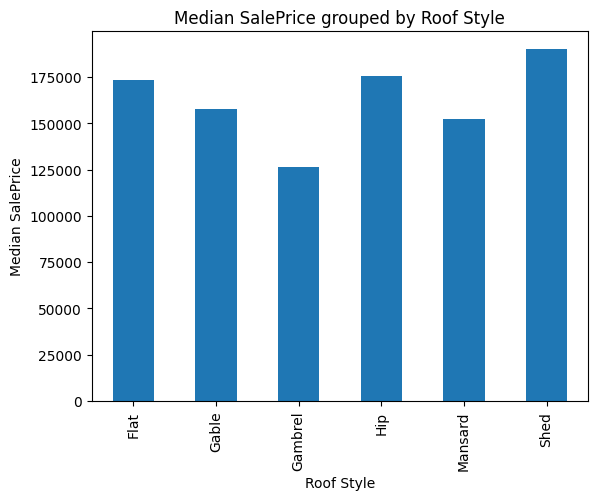

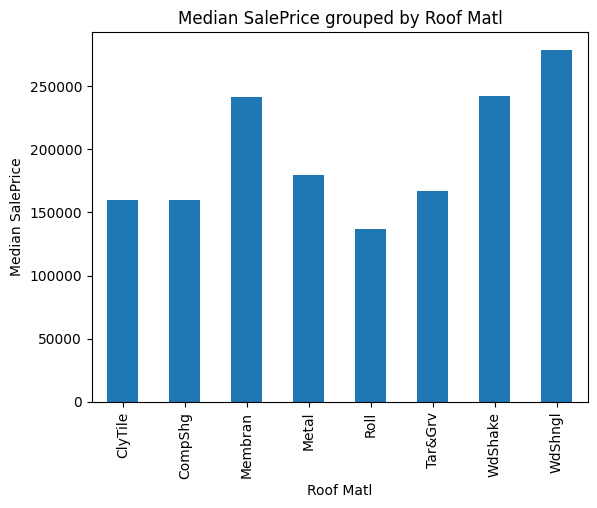

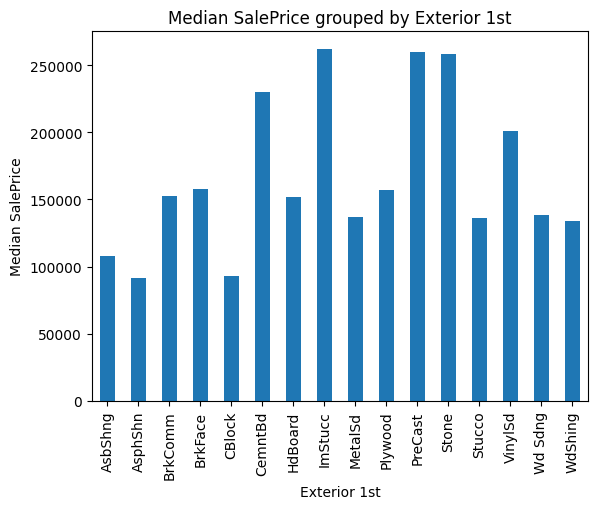

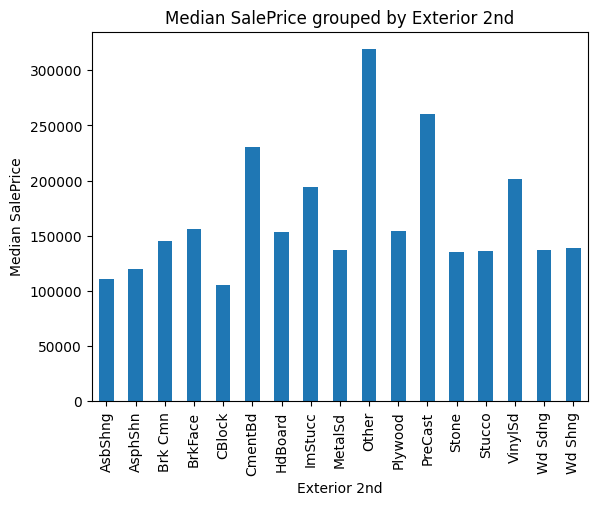

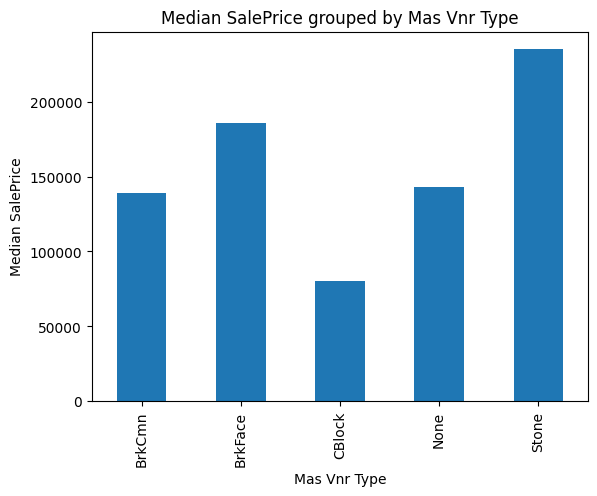

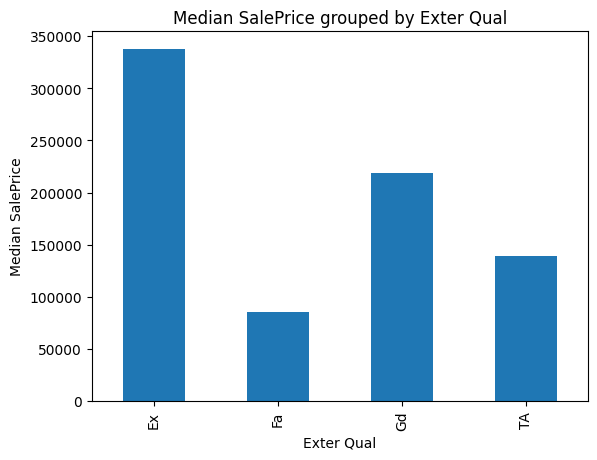

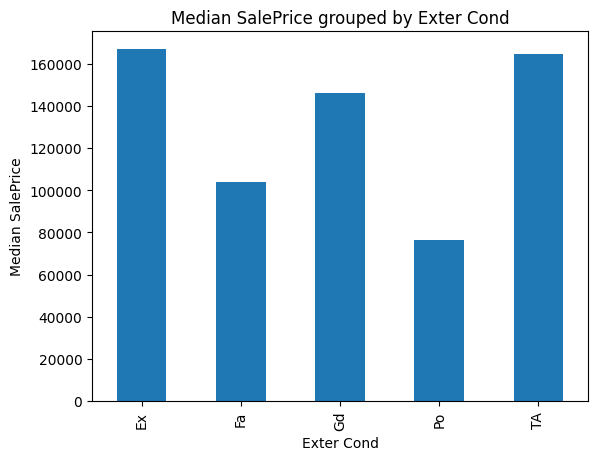

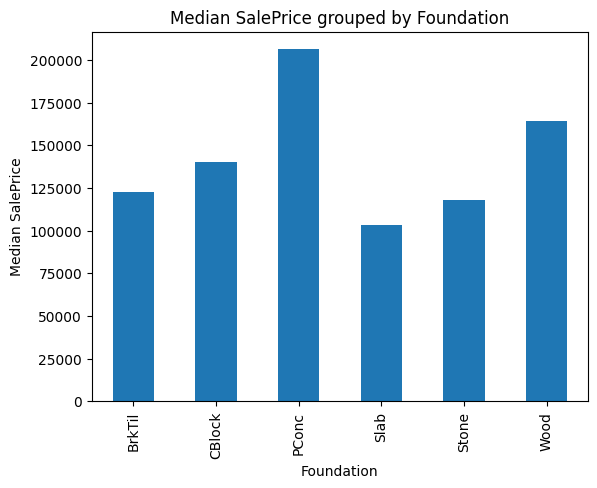

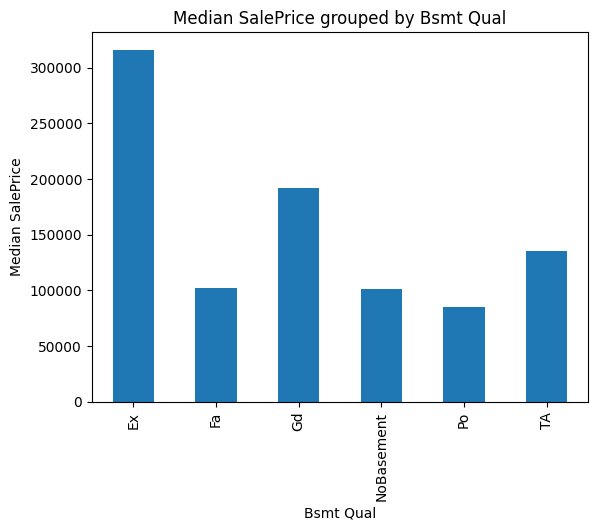

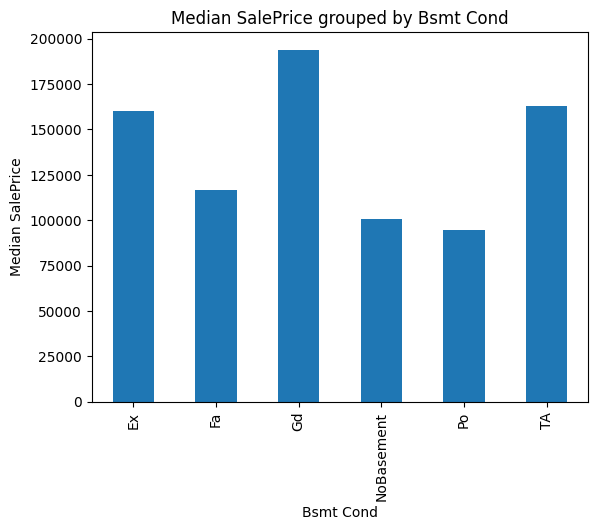

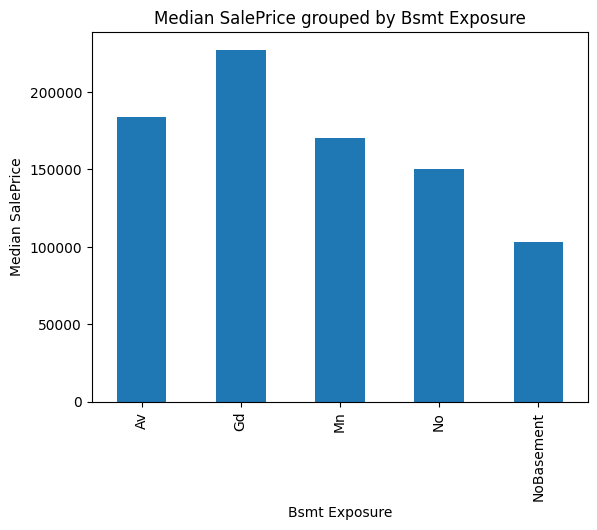

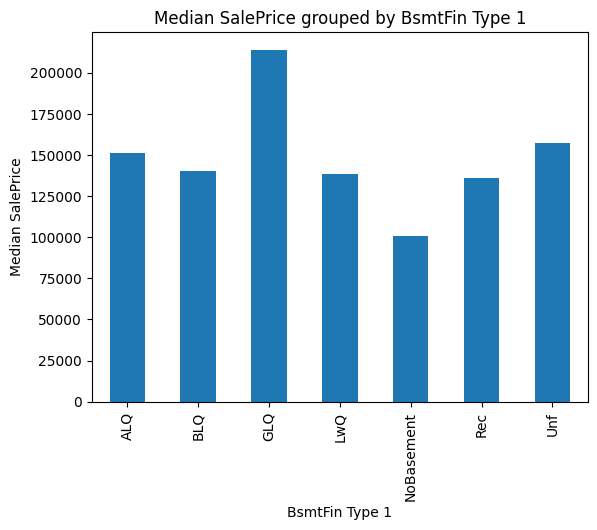

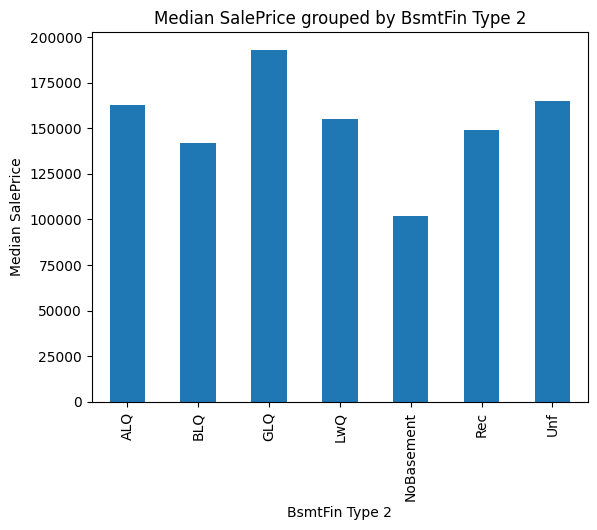

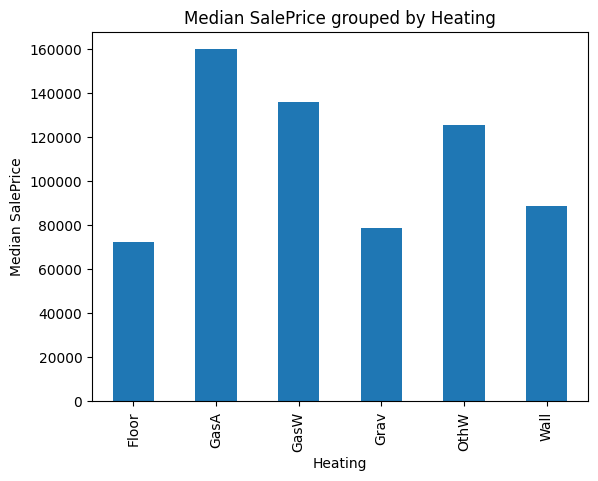

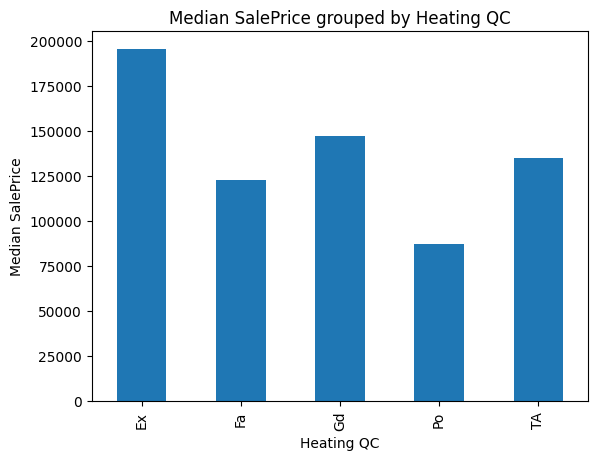

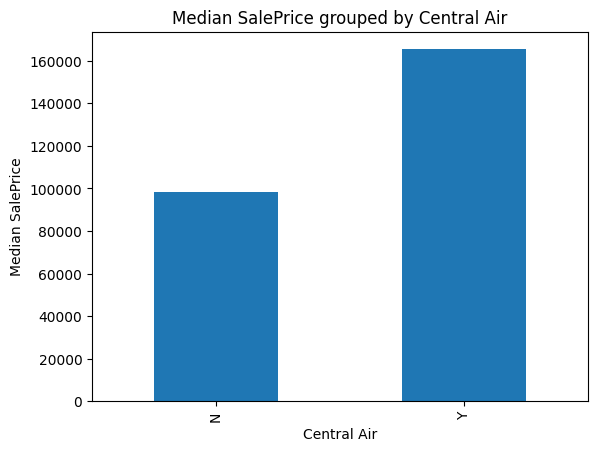

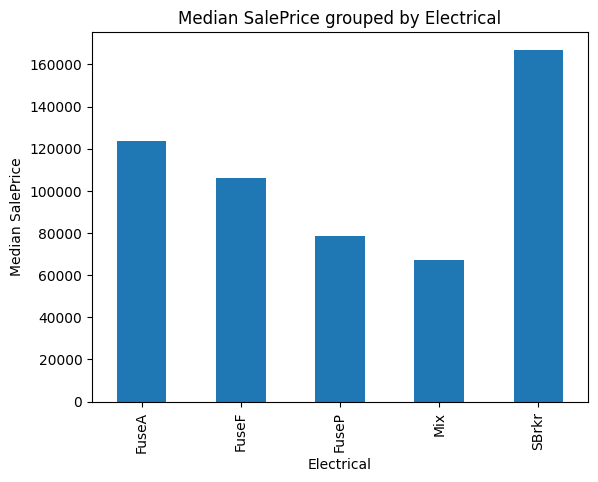

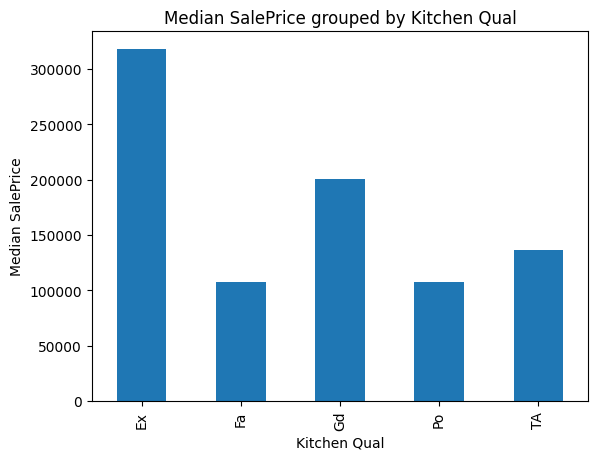

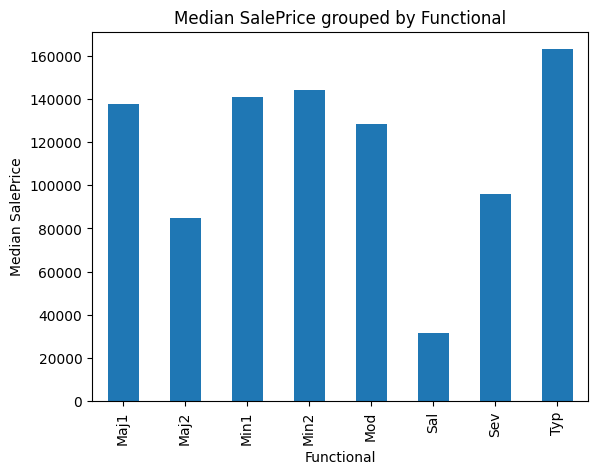

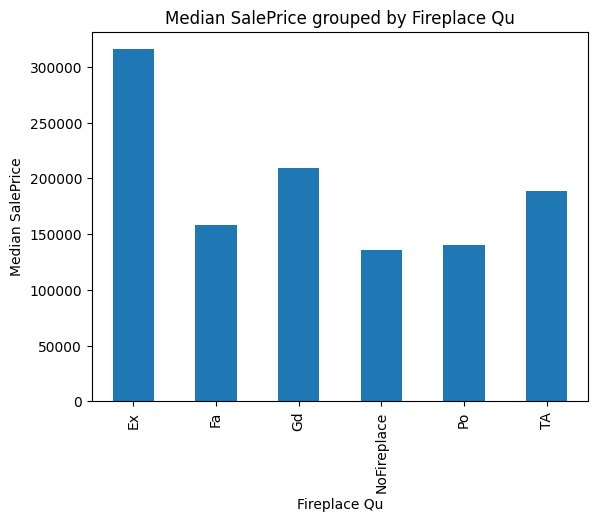

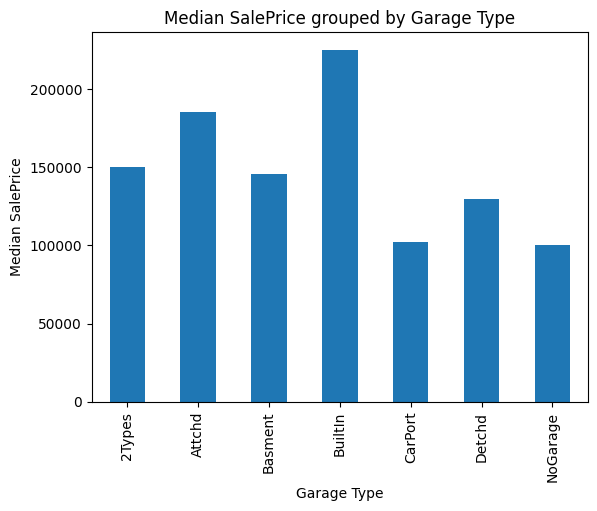

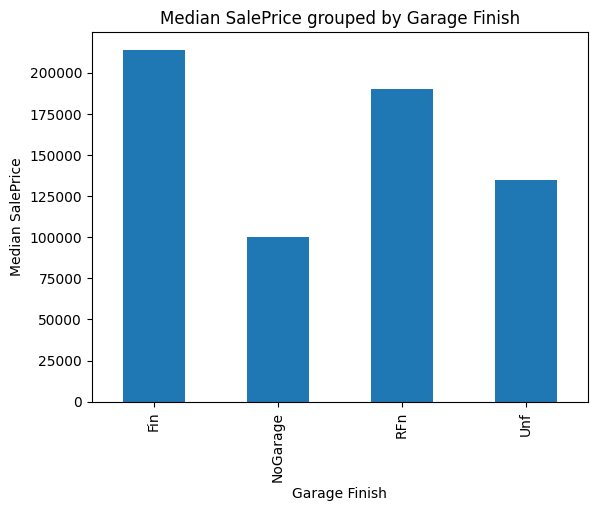

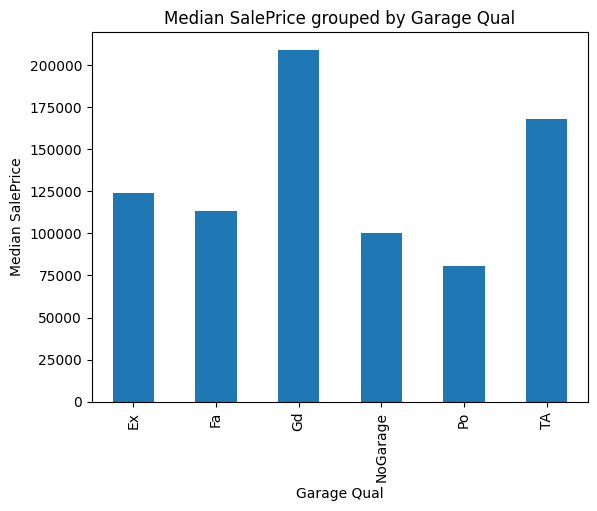

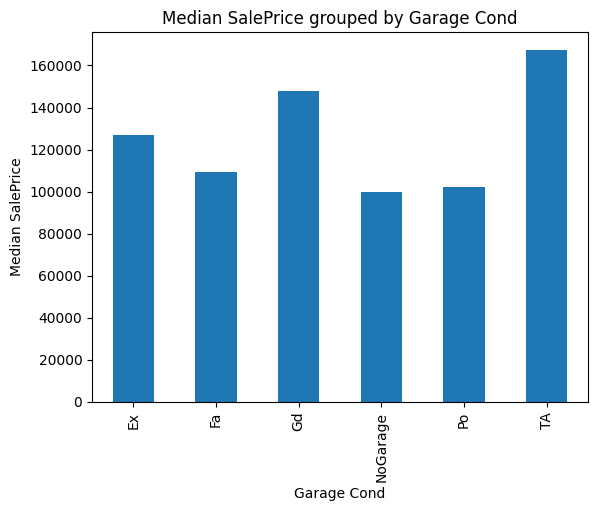

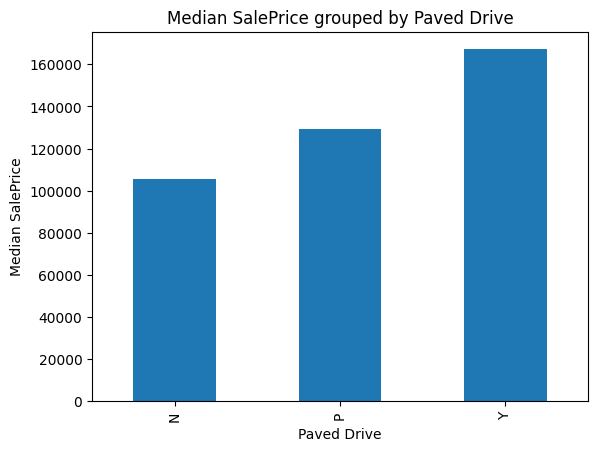

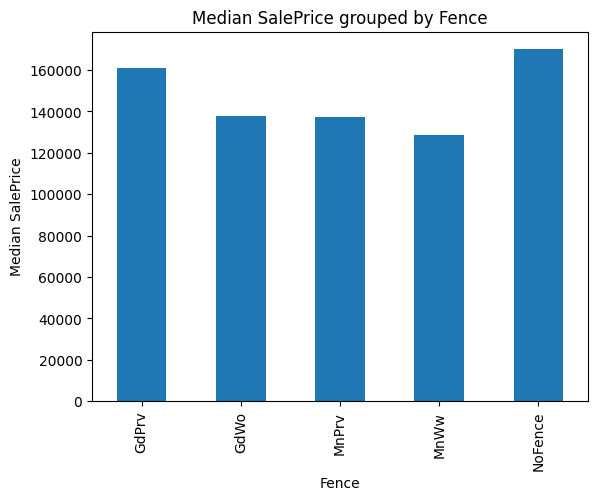

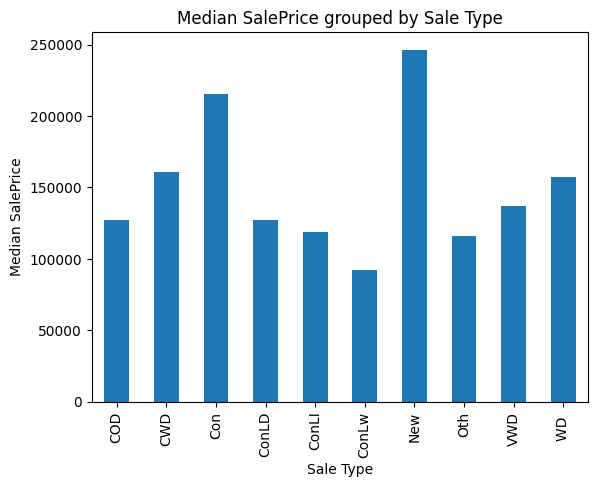

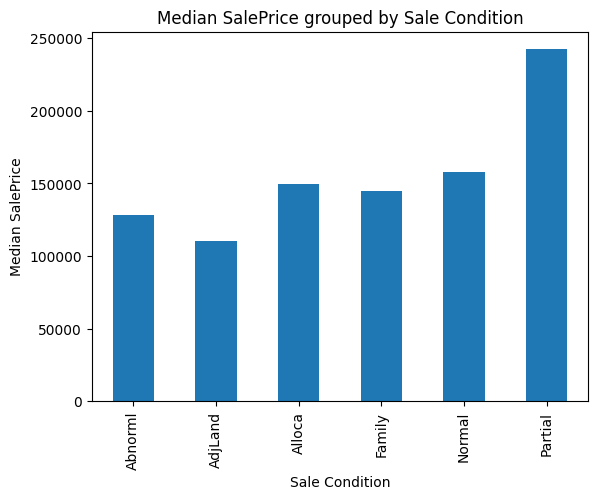

In [28]:
for column in non_int_features:
    median_price = df.groupby(column)['SalePrice'].median()
    median_price.plot.bar()
    plt.title(f'Median SalePrice grouped by {column}')
    plt.ylabel('Median SalePrice')
    plt.xlabel(column)
    plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder
ordinal_columns = ['Exter Qual', 'Fireplace Qu', 'Garage Qual', 'Functional']
encoder = LabelEncoder()
for col in ordinal_columns:
    df[col] = encoder.fit_transform(df[col])

In [30]:
nominal_columns = ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 
                   'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 
                   'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 
                   'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 
                   'Mas Vnr Type', 'Exter Cond', 'Foundation', 'Bsmt Qual', 
                   'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 
                   'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 
                   'Garage Type', 'Garage Finish', 'Garage Cond', 'Paved Drive', 
                   'Fence', 'Sale Type', 'Sale Condition']
df = pd.get_dummies(df, columns=nominal_columns, drop_first=True)

In [31]:
df.head()

Lot Frontage  Overall Qual  Year Built  Year Remod/Add  Mas Vnr Area  \
0         141.0             6        1960            1960         112.0   
1          80.0             5        1961            1961           0.0   
2          81.0             6        1958            1958         108.0   
3          93.0             7        1968            1968           0.0   
4          74.0             5        1997            1998           0.0   

   Exter Qual  BsmtFin SF 1  Total Bsmt SF  Gr Liv Area  Full Bath  ...  \
0           3         639.0         1080.0         1656          1  ...   
1           3         468.0          882.0          896          1  ...   
2           3         923.0         1329.0         1329          1  ...   
3           2        1065.0         2110.0         2110          2  ...   
4           3         791.0          928.0         1629          2  ...   

   Sale Type_ConLw  Sale Type_New  Sale Type_Oth  Sale Type_VWD  \
0            False          False          False          False   
1            False          False          False          False   
2            False          False          False          False   
3            False          False          False          False   
4            False          False          False          False   

   Sale Type_WD   Sale Condition_AdjLand  Sale Condition_Alloca  \
0           True                   False                  False   
1           True                   False                  False   
2           True                   False                  False   
3           True                   False                  False   
4           True                   False                  False   

   Sale Condition_Family  Sale Condition_Normal  Sale Condition_Partial  
0                  False                   True                   False  
1                  False                   True                   False  
2                  False                   True                   False  
3                  False                   True                   False  
4                  False                   True                   False  

[5 rows x 228 columns]

In [32]:
df.shape

(2904, 228)

In [44]:
print("Shape before encoding:", df.shape)
print("Columns before encoding:", df.columns.tolist())

Shape before encoding: (2904, 228)
Columns before encoding: ['Lot Frontage', 'Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual', 'BsmtFin SF 1', 'Total Bsmt SF', 'Gr Liv Area', 'Full Bath', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Yr Blt', 'Garage Cars', 'Garage Qual', 'SalePrice', 'MS Zoning_C (all)', 'MS Zoning_FV', 'MS Zoning_I (all)', 'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM', 'Street_Pave', 'Alley_NoAlley', 'Alley_Pave', 'Lot Shape_IR2', 'Lot Shape_IR3', 'Lot Shape_Reg', 'Land Contour_HLS', 'Land Contour_Low', 'Land Contour_Lvl', 'Utilities_NoSeWa', 'Utilities_NoSewr', 'Lot Config_CulDSac', 'Lot Config_FR2', 'Lot Config_FR3', 'Lot Config_Inside', 'Land Slope_Mod', 'Land Slope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_GrnHill', 'Neighb

In [61]:
co_relation=df.corr()
#correlation.columns
print(co_relation['SalePrice'].sort_values(ascending=False))

SalePrice            1.000000
Overall Qual         0.803888
Gr Liv Area          0.685646
Garage Cars          0.656931
Total Bsmt SF        0.606118
                       ...   
Mas Vnr Type_None   -0.394965
Garage Finish_Unf   -0.439481
Bsmt Qual_TA        -0.469561
Kitchen Qual_TA     -0.544192
Exter Qual          -0.618325
Name: SalePrice, Length: 228, dtype: float64


<Axes: >

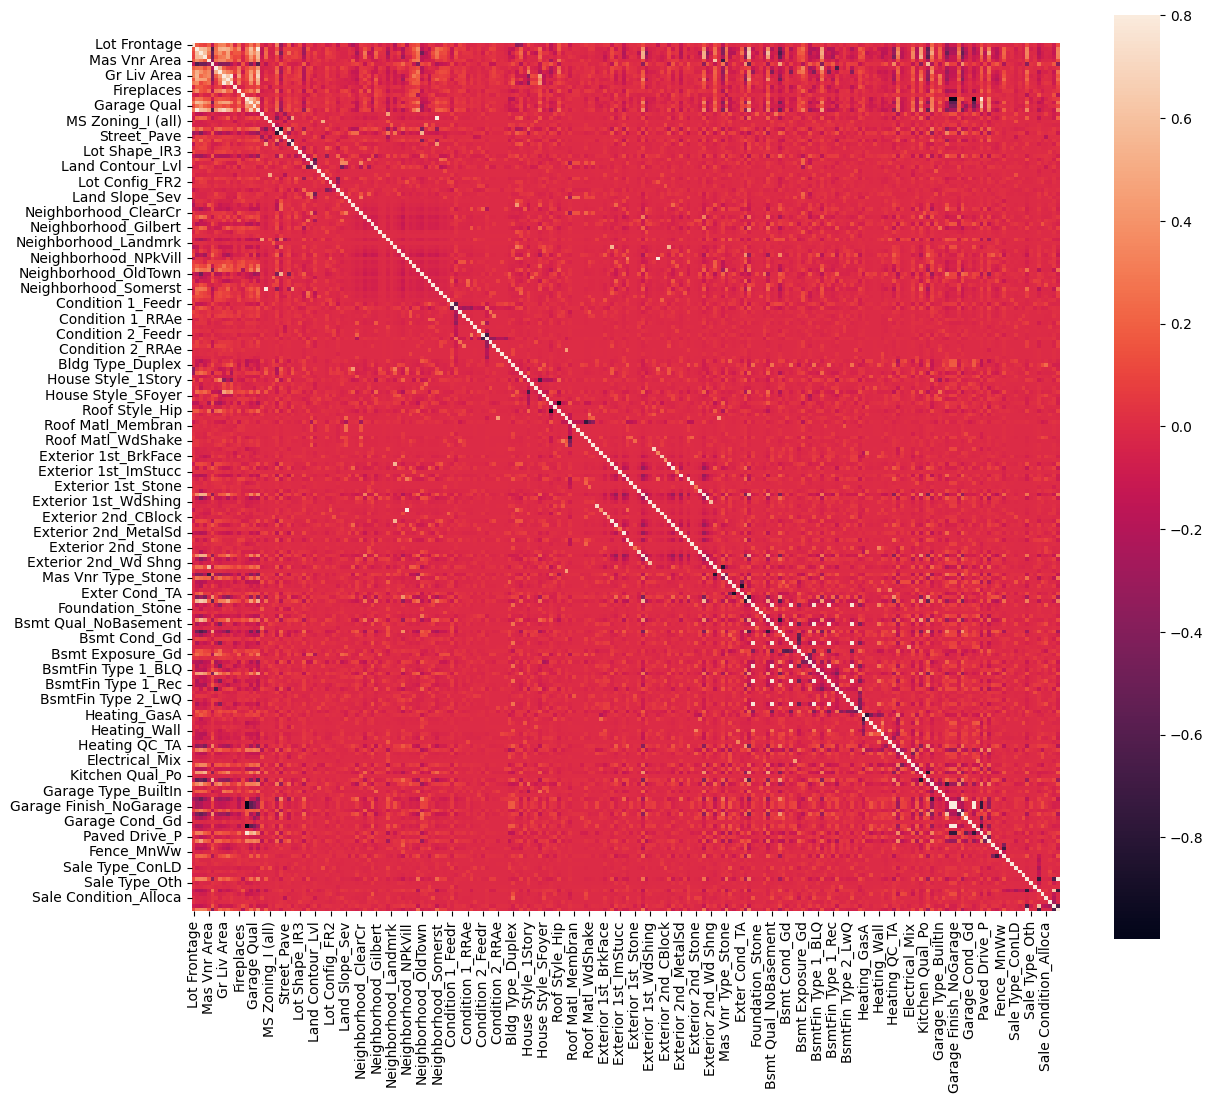

In [45]:
#HeatMap
f , ax= plt.subplots(figsize=(14,12))
sns.heatmap(co_relation,square=True,vmax=0.8)

Index(['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars',
       'Total Bsmt SF', 'Year Built', 'Year Remod/Add', 'Full Bath',
       'Foundation_PConc', 'TotRms AbvGrd', 'Fireplaces', 'BsmtFin Type 1_GLQ',
       'Mas Vnr Area', 'Neighborhood_NridgHt', 'BsmtFin SF 1'],
      dtype='object')


<Axes: >

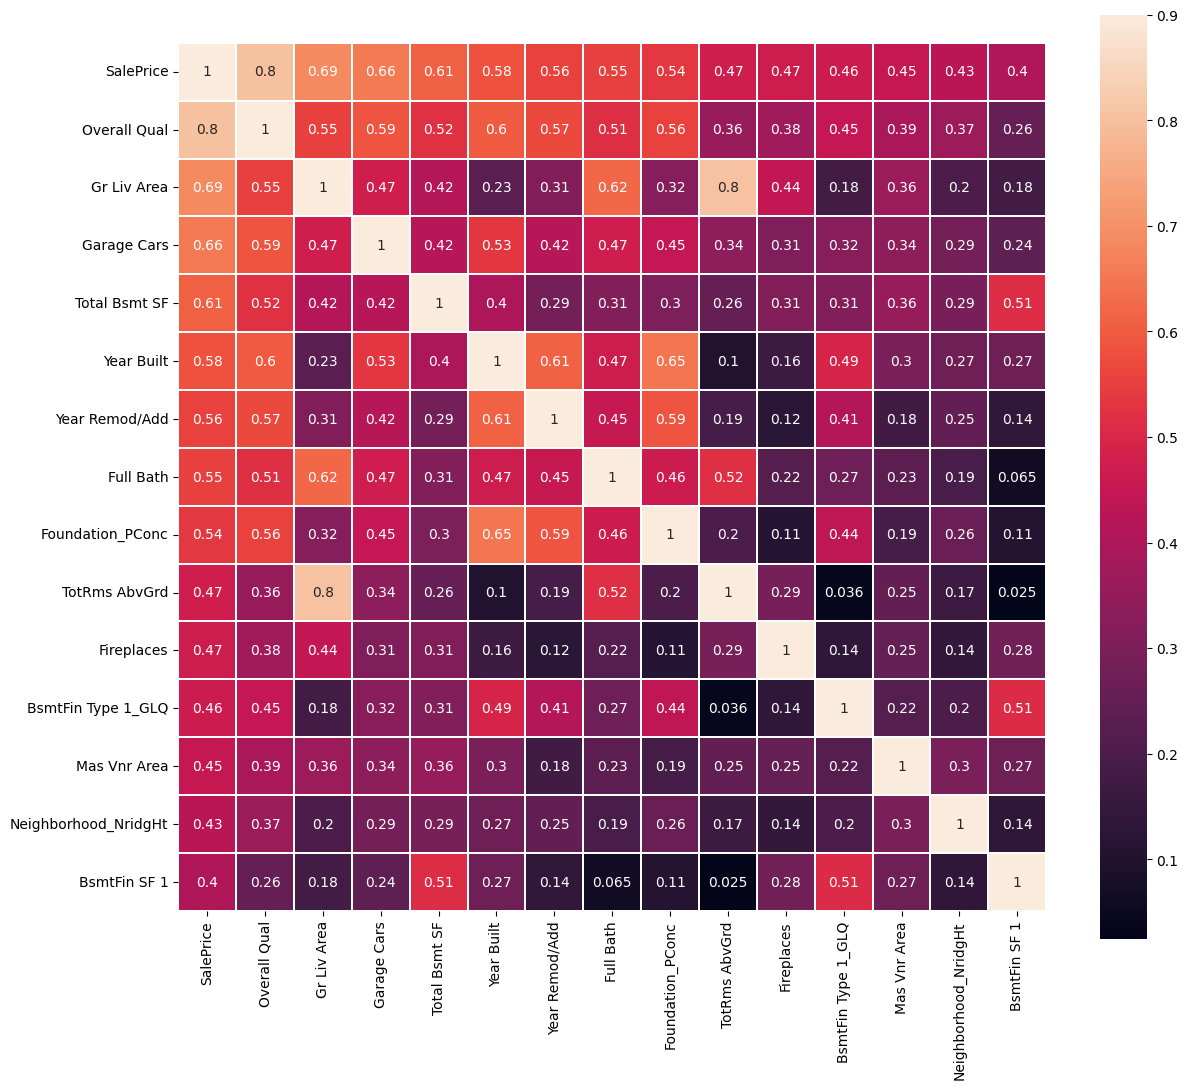

In [54]:
kk=15
colss = co_relation.nlargest(kk,'SalePrice')['SalePrice'].index
print(colss)
#cm = np.corrcoef(df[cols].values.T)
cmm=df[colss].corr()
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cmm, vmax=0.9, linewidths=0.01,square=True,annot=True, xticklabels = colss.values,yticklabels = colss.values)
#sns.heatmap(cm,square=True,vmax=0.8)

In [65]:
selected_columns = [
    'SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', 
    'Year Built', 'Year Remod/Add', 'Full Bath', 'Foundation_PConc', 'TotRms AbvGrd', 
    'Fireplaces', 'BsmtFin Type 1_GLQ', 'Mas Vnr Area', 'Neighborhood_NridgHt', 'BsmtFin SF 1'
]
df_selected = df[selected_columns]
df_selected.drop(['TotRms AbvGrd'],axis=1,inplace=True) #heatmap
df_selected.columns
#df_selected.shape

C:\Users\Acer\AppData\Local\Temp\ipykernel_22160\2200584562.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.drop(['TotRms AbvGrd'],axis=1,inplace=True)


Index(['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars',
       'Total Bsmt SF', 'Year Built', 'Year Remod/Add', 'Full Bath',
       'Foundation_PConc', 'Fireplaces', 'BsmtFin Type 1_GLQ', 'Mas Vnr Area',
       'Neighborhood_NridgHt', 'BsmtFin SF 1'],
      dtype='object')

In [66]:
df_selected.to_csv('cleaned_ames.csv', index=False)